/var/folders/6t/fcfkw2p97jlgqfzgfmqhybt40000gr/T/ipykernel_43008/3718806837.py:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
/var/folders/6t/fcfkw2p97jlgqfzgfmqhybt40000gr/T/ipykernel_43008/3718806837.py:62: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


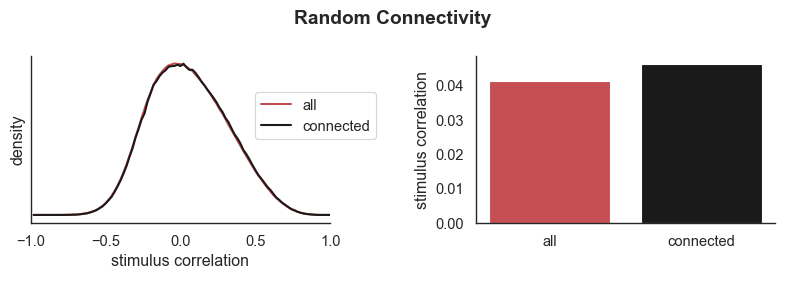

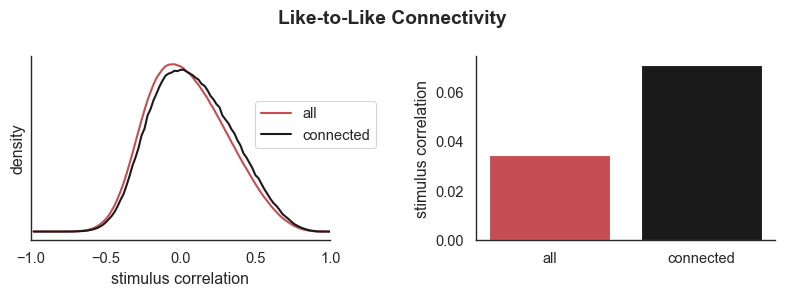

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from time import time as tm
import seaborn as sns
import pickle

SaveFigures=True


sns.set(context='paper',style='white',font_scale=1.2,rc={"lines.linewidth":1.5})
sns.set_palette('muted')

filename='./Data/RandAndLikeLikeHists.npy'
with open(filename, 'rb') as f:
    objects = pickle.load(f)


hAllEERand=objects['hAllEERand']
hConnEERand=objects['hConnEERand']
hUnconnEERand=objects['hUnconnEERand']
hAllEELikeLike=objects['hAllEELikeLike']
hConnEELikeLike=objects['hConnEELikeLike']
hUnconnEELikeLike=objects['hUnconnEELikeLike']
CorrBins=objects['CorrBins']
mAllEECorrsRand=objects['mAllEECorrsRand']
mConnectedEECorrsRand=objects['mConnectedEECorrsRand']
mUnconnectedEECorrsRand=objects['mUnconnectedEECorrsRand']
mAllEECorrsLikeLike=objects['mAllEECorrsLikeLike']
mConnectedEECorrsLikeLike=objects['mConnectedEECorrsLikeLike']
mUnconnectedEECorrsLikeLike=objects['mUnconnectedEECorrsLikeLike']

plt.subplots(figsize=(8,3))

plt.subplot(1,2,1)
#plt.plot(CorrBins[1:],hUnconnEERand,'r', label="unconnected")#: mean corr={:.3f}".format(mUnconnectedEECorrsRand))
plt.plot(CorrBins[1:],hAllEERand,'r', label="all")#: mean corr={:.3f}".format(mAllEECorrsRand))
plt.plot(CorrBins[1:],hConnEERand,'k', label="connected") #: mean corr={:.3f}".format(mConnectedEECorrsRand))
plt.ylabel('density')
plt.xlabel('stimulus correlation\n')
plt.legend(loc=(.75,.5))
plt.xlim([-1,1])
plt.suptitle('Random Connectivity', weight='bold')
plt.yticks([])
sns.despine()

plt.subplot(1,2,2)
plt.bar([0,1],[mUnconnectedEECorrsRand,mConnectedEECorrsRand],color=['r','k'],width=0.8,tick_label=['all','connected'])
plt.ylabel('\nstimulus correlation')
sns.despine()
plt.tight_layout()


# Save figure if needed
if SaveFigures:
    plt.savefig('./Figures/HistAndBarsRand.pdf')

    
    
###

plt.subplots(figsize=(8,3))
plt.subplot(1,2,1)
#plt.plot(CorrBins[1:],hUnconnEELikeLike,'r', label="unconnected")#: mean corr={:.3f}".format(mUnconnectedEECorrsLikeLike))
plt.plot(CorrBins[1:],hAllEELikeLike,'r', label="all")#: mean corr={:.3f}".format(mAllEECorrsLikeLike))
plt.plot(CorrBins[1:],hConnEELikeLike,'k', label="connected")#: mean corr={:.3f}".format(mConnectedEECorrsLikeLike))
plt.ylabel('density')
plt.xlabel('stimulus correlation')
plt.legend(loc=(.75,.5))
plt.xlim([-1,1])
plt.suptitle('Like-to-Like Connectivity', weight='bold')
plt.yticks([])
sns.despine()

plt.subplot(1,2,2)
plt.bar([0,1],[mUnconnectedEECorrsLikeLike,mConnectedEECorrsLikeLike],color=['r','k'],width=0.8,tick_label=['all','connected'])
plt.ylabel('\nstimulus correlation')
sns.despine()
plt.tight_layout()

# Save figure if needed
if SaveFigures:
    plt.savefig('./Figures/HistAndBarsLikeLike.pdf')

    